In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# load data
data = pd.read_csv('train.csv')
data = data.drop(data.columns[0], axis=1)  
data = data.drop('id', axis=1)  
data = data.dropna() 

# rating column lists
rating_columns = [
    'Inflight wifi service', 
    'Departure/Arrival time convenient', 
    'Ease of Online booking', 
    'Gate location', 
    'Food and drink', 
    'Online boarding', 
    'Seat comfort', 
    'Inflight entertainment',
    'On-board service', 
    'Leg room service', 
    'Baggage handling', 
    'Checkin service',
    'Inflight service', 
    'Cleanliness'
]

delay_columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Convert Value
for column in rating_columns + delay_columns:
    if column in delay_columns:
        data[column] = pd.cut(data[column].astype(int), bins=[-1, 15, 60, 180, 1440], labels=['None', 'Short', 'Medium', 'Long'])
    else:
        data[column] = pd.cut(data[column].astype(int), bins=[0, 2, 3, 5], labels=['Low', 'Medium', 'High'])

# Convert Value
data['Age'] = pd.cut(data['Age'], bins=[0, 18, 35, 65, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
data['Flight Distance'] = pd.cut(data['Flight Distance'], bins=[0, 500, 1000, 2000, 4000], labels=['Short', 'Medium', 'Long', 'Very Long'])

# One Hot Coding
data_encoded = pd.get_dummies(data)
display(data_encoded)

# Using Apriori
frequent_itemsets = apriori(data_encoded, min_support=0.3, use_colnames=True)

# Association Rule
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

# Filter the rules
rules = rules[rules['consequents'].apply(lambda x: len(x) == 1 and any(item in x for item in ['satisfaction_neutral or dissatisfied', 'satisfaction_satisfied']))]

# Format the output
def format_itemset(itemset):
    formatted = []
    for item in itemset:
        
        if any(rating in item for rating in rating_columns + delay_columns):
            formatted.append(item)
        else:
            
            formatted.append(item.split('_')[-1])
    return ', '.join(formatted)

# Apply the formatting
rules['antecedents'] = rules['antecedents'].apply(format_itemset)
rules['consequents'] = rules['consequents'].apply(format_itemset)

# Show all
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  

# Show rules
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Age_Child,Age_Young Adult,Age_Adult,Age_Senior,Type of Travel_Business travel,Type of Travel_Personal Travel,...,Departure Delay in Minutes_None,Departure Delay in Minutes_Short,Departure Delay in Minutes_Medium,Departure Delay in Minutes_Long,Arrival Delay in Minutes_None,Arrival Delay in Minutes_Short,Arrival Delay in Minutes_Medium,Arrival Delay in Minutes_Long,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,0,1,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
103900,0,1,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
103901,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
103902,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


c:\Users\seanl\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
85,Business,satisfied,0.331969,0.694285,1.601972
89,Eco,neutral or dissatisfied,0.366064,0.813899,1.436446
95,Inflight wifi service_Low,neutral or dissatisfied,0.302537,0.719887,1.270524
122,Online boarding_High,satisfied,0.358254,0.723126,1.668520
136,Seat comfort_High,satisfied,0.337211,0.601515,1.387918
151,Inflight entertainment_High,satisfied,0.330724,0.628873,1.451043
274,"Business travel, Loyal Customer",satisfied,0.358853,0.705462,1.627761
283,"Business, Loyal Customer",satisfied,0.303937,0.746273,1.721928
319,"Loyal Customer, Online boarding_High",satisfied,0.325530,0.738810,1.704709
347,"Seat comfort_High, Loyal Customer",satisfied,0.319748,0.655142,1.511656


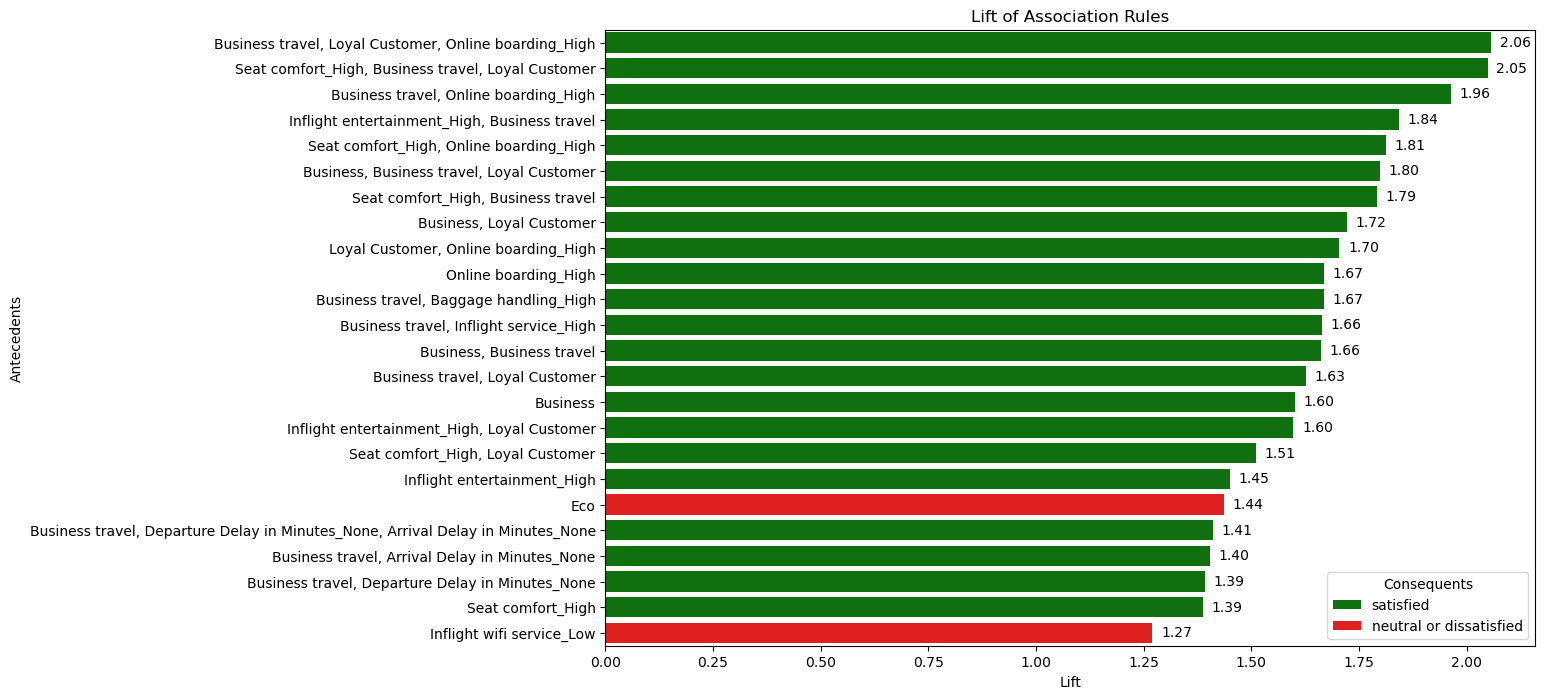

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


rules = rules.sort_values(by='lift', ascending=False)


palette = {'satisfied': 'green', 'neutral or dissatisfied': 'red'}


plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='lift', y='antecedents', hue='consequents', data=rules,
    dodge=False, palette=palette
)


plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.title('Lift of Association Rules')
plt.legend(title='Consequents')


for p in barplot.patches:
    width = p.get_width()  
    if width > 0:  
        plt.text(p.get_x() + width + 0.02,  
                 p.get_y() + p.get_height() / 2,  
                 '{:.2f}'.format(width),  
                 va='center', ha='left') 

plt.show()

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# load data
data = pd.read_csv('train.csv')
data = data.drop(data.columns[0], axis=1)  
data = data.drop('id', axis=1) 
data = data.dropna()  

# rating column lists
rating_columns = [
    'Inflight wifi service', 
    'Departure/Arrival time convenient', 
    'Ease of Online booking', 
    'Gate location', 
    'Food and drink', 
    'Online boarding', 
    'Seat comfort', 
    'Inflight entertainment',
    'On-board service', 
    'Leg room service', 
    'Baggage handling', 
    'Checkin service',
    'Inflight service', 
    'Cleanliness'
]

delay_columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Convert Value
for column in rating_columns + delay_columns:
    if column in delay_columns:
        data[column] = pd.cut(data[column].astype(int), bins=[-1, 15, 60, 180, 1440], labels=['None', 'Short', 'Medium', 'Long'])
    else:
        data[column] = pd.cut(data[column].astype(int), bins=[0, 2, 3, 5], labels=['Low', 'Medium', 'High'])

# Convert Value
data['Age'] = pd.cut(data['Age'], bins=[0, 18, 35, 65, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
data['Flight Distance'] = pd.cut(data['Flight Distance'], bins=[0, 500, 1000, 2000, 4000], labels=['Short', 'Medium', 'Long', 'Very Long'])

# One Hot Coding
data_encoded = pd.get_dummies(data)


# Using Apriori
frequent_itemsets = apriori(data_encoded, min_support=0.3, use_colnames=True)

# Association Rule
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Filter the rules
rules = rules[rules['consequents'].apply(lambda x: len(x) == 1 and any(item in x for item in [#'satisfaction_neutral or dissatisfied', 
                                                                                              'satisfaction_satisfied']))]

# Format the output
def format_itemset(itemset):
    formatted = []
    for item in itemset:
        
        if any(rating in item for rating in rating_columns + delay_columns):
            formatted.append(item)
        else:
            
            formatted.append(item.split('_')[-1])
    return ', '.join(formatted)

# Apply the formatting
rules['antecedents'] = rules['antecedents'].apply(format_itemset)
rules['consequents'] = rules['consequents'].apply(format_itemset)

# Show all
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  

# Show rules
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


c:\Users\seanl\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
75,Online boarding_High,satisfied,0.358254,0.723126,1.668520
172,"Business travel, Loyal Customer",satisfied,0.358853,0.705462,1.627761
179,"Business, Loyal Customer",satisfied,0.303937,0.746273,1.721928
206,"Loyal Customer, Online boarding_High",satisfied,0.325530,0.738810,1.704709
336,"Business, Business travel",satisfied,0.329421,0.720201,1.661770
348,"Business travel, Online boarding_High",satisfied,0.335695,0.850851,1.963229
361,"Seat comfort_High, Business travel",satisfied,0.321978,0.776167,1.790905
379,"Inflight entertainment_High, Business travel",satisfied,0.317837,0.798380,1.842159
410,"Business travel, Baggage handling_High",satisfied,0.314053,0.722881,1.667955
416,"Business travel, Inflight service_High",satisfied,0.314159,0.720883,1.663345


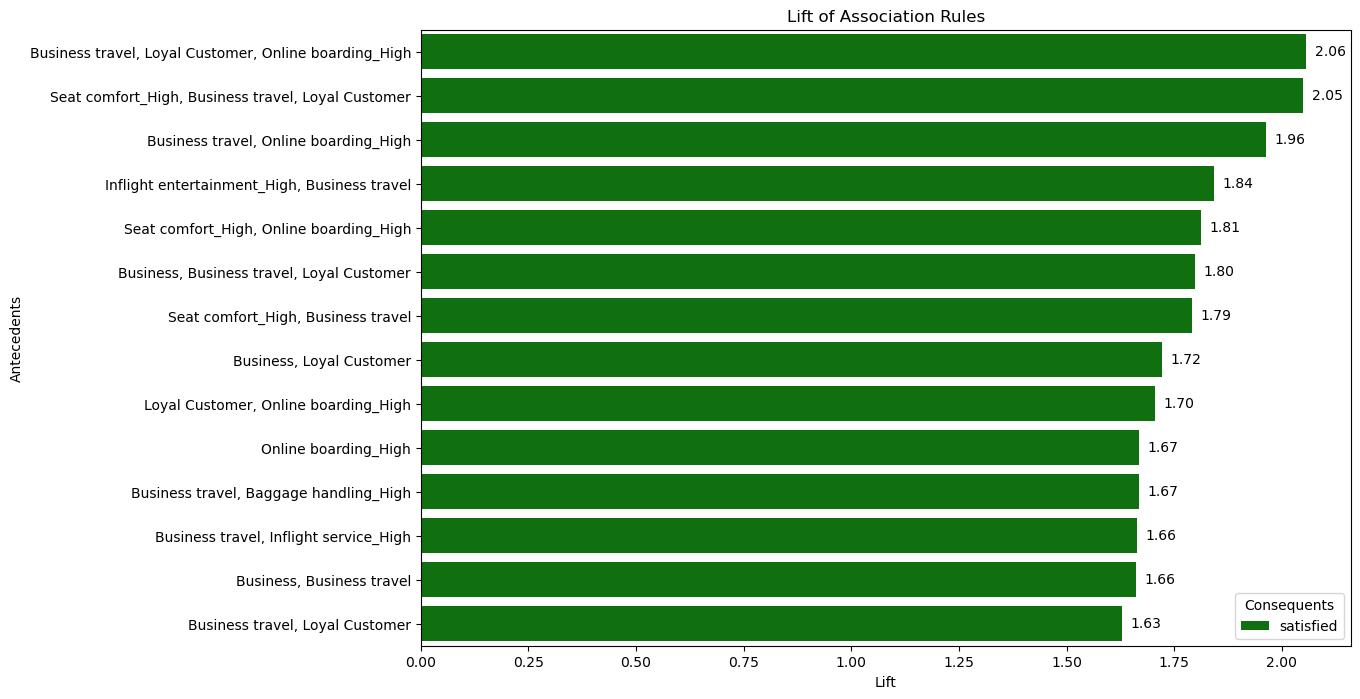

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


rules = rules.sort_values(by='lift', ascending=False)


palette = {'satisfied': 'green', 'neutral or dissatisfied': 'red'}


plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='lift', y='antecedents', hue='consequents', data=rules,
    dodge=False, palette=palette
)


plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.title('Lift of Association Rules')
plt.legend(title='Consequents')


for p in barplot.patches:
    width = p.get_width()  
    if width > 0:  
        plt.text(p.get_x() + width + 0.02,  
                 p.get_y() + p.get_height() / 2,  
                 '{:.2f}'.format(width),  
                 va='center', ha='left') 

plt.show()


In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# load data
data = pd.read_csv('train.csv')
data = data.drop(data.columns[0], axis=1)  
data = data.drop('id', axis=1)  
data = data.dropna()  

# rating column lists
rating_columns = [
    'Inflight wifi service', 
    'Departure/Arrival time convenient', 
    'Ease of Online booking', 
    'Gate location', 
    'Food and drink', 
    'Online boarding', 
    'Seat comfort', 
    'Inflight entertainment',
    'On-board service', 
    'Leg room service', 
    'Baggage handling', 
    'Checkin service',
    'Inflight service', 
    'Cleanliness'
]

delay_columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Convert Value
for column in rating_columns + delay_columns:
    if column in delay_columns:
        data[column] = pd.cut(data[column].astype(int), bins=[-1, 15, 60, 180, 1440], labels=['None', 'Short', 'Medium', 'Long'])
    else:
        data[column] = pd.cut(data[column].astype(int), bins=[0, 2, 3, 5], labels=['Low', 'Medium', 'High'])

# Convert Value
data['Age'] = pd.cut(data['Age'], bins=[0, 18, 35, 65, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
data['Flight Distance'] = pd.cut(data['Flight Distance'], bins=[0, 500, 1000, 2000, 4000], labels=['Short', 'Medium', 'Long', 'Very Long'])

# One Hot Coding
data_encoded = pd.get_dummies(data)

# Using Apriori
frequent_itemsets = apriori(data_encoded, min_support=0.25, use_colnames=True)

# Association Rule
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Filter the rules
rules = rules[rules['consequents'].apply(lambda x: len(x) == 1 and any(item in x for item in ['satisfaction_neutral or dissatisfied'#, 
                                                                                              #'satisfaction_satisfied'
                                                                                              ]))]

# Format the output
def format_itemset(itemset):
    formatted = []
    for item in itemset:
       
        if any(rating in item for rating in rating_columns + delay_columns):
            formatted.append(item)
        else:
            
            formatted.append(item.split('_')[-1])
    return ', '.join(formatted)

# Apply the formatting
rules['antecedents'] = rules['antecedents'].apply(format_itemset)
rules['consequents'] = rules['consequents'].apply(format_itemset)

# Show all
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  

# Show rules
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


c:\Users\seanl\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
54,Personal Travel,neutral or dissatisfied,0.278645,0.898441,1.585653
62,Eco,neutral or dissatisfied,0.366064,0.813899,1.436446
67,Inflight wifi service_Low,neutral or dissatisfied,0.302537,0.719887,1.270524
225,"Personal Travel, Loyal Customer",neutral or dissatisfied,0.277313,0.898705,1.586119
249,"Eco, Loyal Customer",neutral or dissatisfied,0.275779,0.799894,1.411728
727,"Eco, Departure Delay in Minutes_None",neutral or dissatisfied,0.278201,0.796991,1.406605
730,"Eco, Arrival Delay in Minutes_None",neutral or dissatisfied,0.273858,0.795056,1.403191
2771,"Eco, Departure Delay in Minutes_None, Arrival Delay in Minutes_None",neutral or dissatisfied,0.258683,0.791669,1.397212


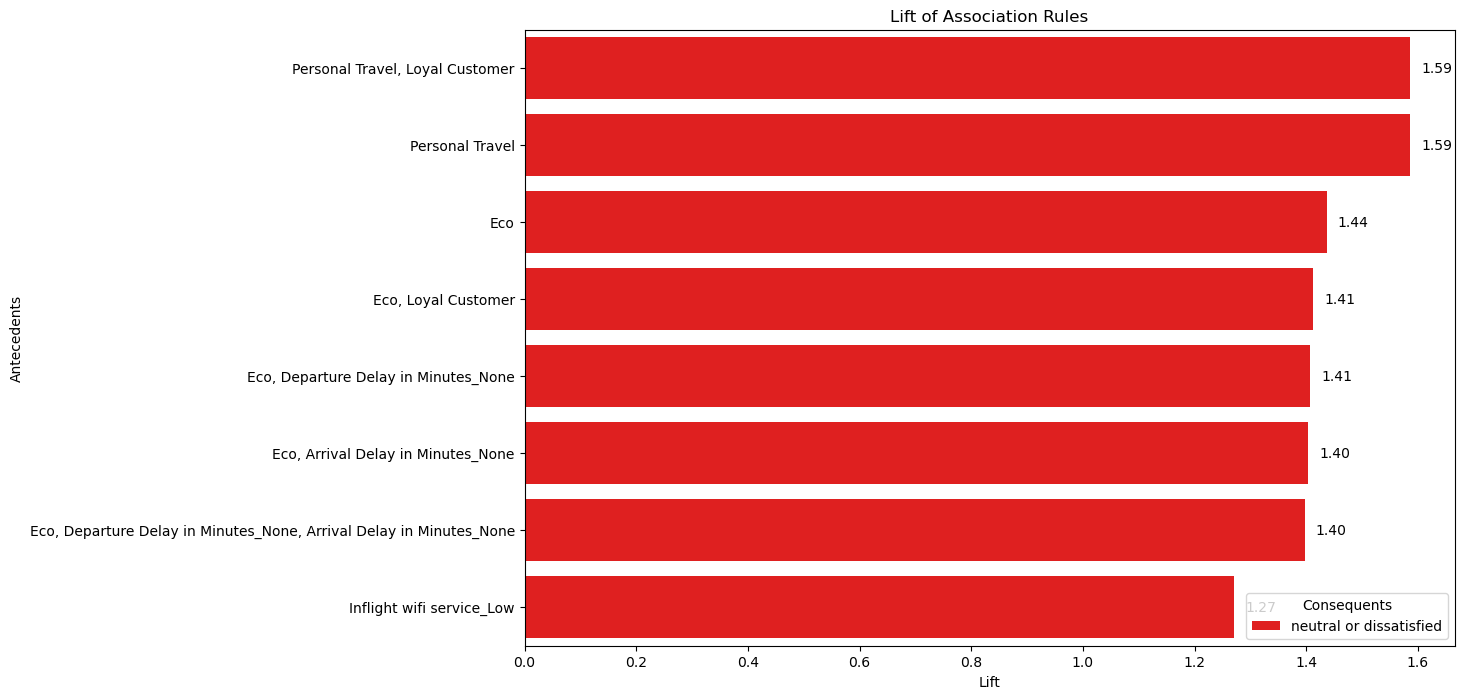

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


rules = rules.sort_values(by='lift', ascending=False)


palette = {'satisfied': 'green', 'neutral or dissatisfied': 'red'}


plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='lift', y='antecedents', hue='consequents', data=rules,
    dodge=False, palette=palette
)


plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.title('Lift of Association Rules')
plt.legend(title='Consequents')


for p in barplot.patches:
    width = p.get_width()  
    if width > 0:  
        plt.text(p.get_x() + width + 0.02,  
                 p.get_y() + p.get_height() / 2,  
                 '{:.2f}'.format(width),  
                 va='center', ha='left') 

plt.show()
